In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
READ_FILE = '2D'

In [10]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(env.AREA_ONE_LENGTH())]))
    return df

In [17]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // env.AREA_ONE_LENGTH())
        col = str(area_id % env.AREA_ONE_LENGTH()) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [23]:
csv_array = {}
def main(args, array):
    base = create_base_dataframe()
    df = pd.read_csv(env.get_full_path('2D', args),
                                                        encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))

    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
        array[args.dir][args.ratio][args.seed][args.csv][_times] = _group
        
env.for_default_init(main, csv_array)

In [27]:
people='p10000'
ratio='r4'
seed='s123'
csv='mobile'
time='3600'

In [29]:
df = csv_array[people][ratio][seed][csv][time].copy()
df.head()

,time,area,people
0,3600,0.0,15.0
1,3600,1.0,9.0
2,3600,2.0,0.0
3,3600,3.0,0.0
4,3600,4.0,12.0


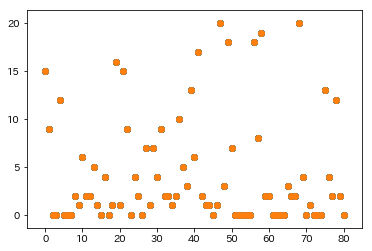

In [35]:
def show_figure(args):
    for _times in env.TIMES_LIST():
        df = csv_array[people][ratio][seed][csv][time].copy()
        plt.plot(df['area'], df['people'])
        plt.scatter(df['area'], df['people'])
        
env.for_default(show_figure)

In [61]:
people='p10000'
ratio='r4'
seed='s123'
csv='census'
time='7200'

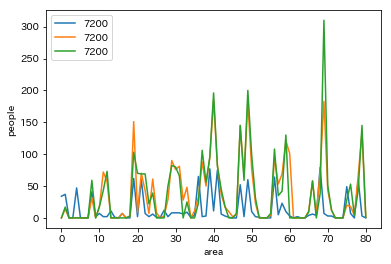

In [68]:
# plt.figure(dpi=600)
for _dir in [people]:
    for _ratio in [ratio]:
        for _seed in [seed]:
            for _csv in ['mobile', 'census', 'od']:
                for _times in [time]:
                    df = csv_array[_dir][_ratio][_seed][_csv][_times].copy()
                    plt.xlabel('area')
                    plt.ylabel('people')
                    plt.plot(df['area'], df['people'], label=_times)
#                     plt.scatter(df['area'], df['people'], label=_times)
                    plt.legend()